# ATAC-seq Visualization

Many times, we want to visualise bigwig files from bulk ATAC-seq, and we usually use IGV for this step, while code visualisation in Python, has been lacking at the moment. We will demonstrate the visualisation process in the bulk module of epiverse.

In [1]:
import omicverse as ov
ov.ov_plot_set()

In [2]:
import Epiverse as ev

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## Construct the bigwig object

We first prepare a directory of bigwig files that we need to visualise. epiverse supports visualising multiple files at the same time, but of course you can also visualise just one file.
We provide the directory in dictionary format.

In [3]:
bw_dict={
    'oocyte_H3K4me1_rep1':'data/GSE114954_RAW/GSM3359495_oocyte_H3K4me1_rep1.bw',
    'oocyte_H3K4me1_rep2':'data/GSE114954_RAW/GSM3359496_oocyte_H3K4me1_rep2.bw'
}
bw_obj=ev.bulk.bigwig(bw_dict)
bw_obj.read()

## Read the gene annotation

(nonecessary) When we visualise chromosomal regions, we usually want to see genetic information as well. This is where we can provide gtf files as input.

In [5]:
bw_obj.load_gtf('gtf/danRer7.refGene.gtf.gz')

## Plot track

### plot obtional

If you wish to specify personalised plot colours, we provide here a few interesting parameters as input to plot_track.

- color_dict: the color of each bigwig
- region_dict: the region we interested
- plot_names: the names of bigwig, if not provided ,it will use the keys of bigwig_dict

In [7]:
color_dict={
    'oocyte_H3K4me1_rep1':ov.utils.blue_color[3],
    'oocyte_H3K4me1_rep2':ov.utils.blue_color[3]
}
region_dict={
    'region1':[46050000, 46050000+5000],
    'region2':[46056000,46057000]
}

(<Figure size 480x240 with 3 Axes>,
 array([<AxesSubplot: ylabel='Rep1'>, <AxesSubplot: ylabel='Rep2'>,
        <AxesSubplot: >], dtype=object))

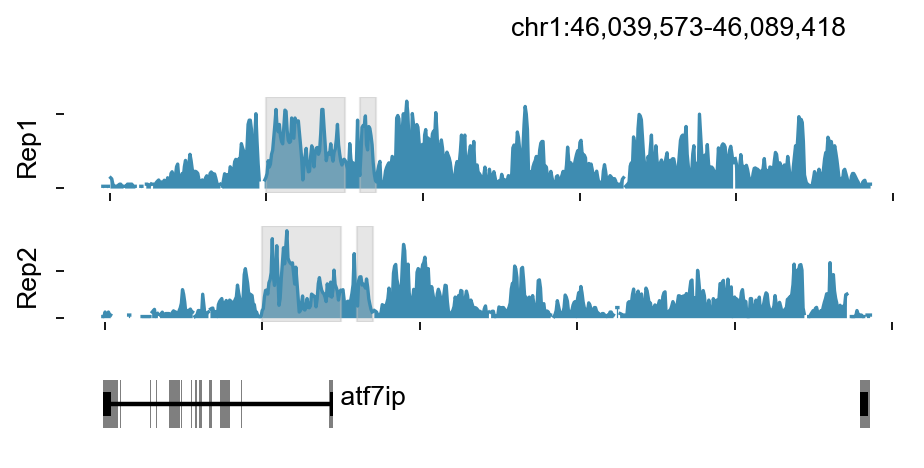

In [8]:
bw_obj.plot_track(chrom='chr1',chromstart=46039573,chromend=46089418,
                  plot_names=['Rep1','Rep2'],figwidth=6,figheight=1,
                  color_dict=color_dict,
                  region_dict=region_dict)
